In [175]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px


In [176]:
# Finding the companies ranking as per the stock prices
Stockprices_df = pd.read_csv('/content/Stock Prices(Daily Stock prices) (1).csv')
Stockprices_df_filtered = Stockprices_df.dropna()
print(Stockprices_df_filtered)
Stockprices_df_filtered.info()

           Company    Year    Open    High     Low   Close  Adj Close  \
0     Saudi Aramco  2021.0   28.93   28.93   28.80   28.80      26.24   
1     Saudi Aramco  2021.0   28.80   28.93   28.76   28.80      26.24   
2     Saudi Aramco  2021.0   28.84   28.84   28.64   28.80      26.24   
3     Saudi Aramco  2021.0   28.80   28.88   28.68   28.76      26.20   
4     Saudi Aramco  2021.0   28.72   28.84   28.68   28.84      26.27   
...            ...     ...     ...     ...     ...     ...        ...   
7518           TSM  2023.0  102.93  103.59  102.71  103.15     103.15   
7519           TSM  2023.0  103.61  104.96  103.57  104.45     104.45   
7520           TSM  2023.0  105.05  105.37  104.08  104.65     104.65   
7521           TSM  2023.0  105.00  105.52  104.70  104.70     104.70   
7522           TSM  2023.0  104.72  104.97  103.67  104.00     104.00   

            Volume  
0     1,974,842.00  
1     2,807,501.00  
2     4,695,225.00  
3     3,659,585.00  
4     3,905,314.00

In [186]:
# Group data by 'Company', calculate average 'Close' price over the last three years
average_prices = Stockprices_df_filtered.groupby('Company')['Close'].mean().reset_index()


# Rank companies based on average stock price
ranked_companies = average_prices.sort_values(by='Close', ascending=False).reset_index(drop=True)

# Display the rankings
print("Rankings of companies based on average stock price over the last three years:")
print(ranked_companies)
import plotly.graph_objects as go


#Creating a bar plot
fig = go.Figure()

fig.add_trace(go.Bar(
    y=ranked_companies['Company'],
    x=ranked_companies['Close'],
    orientation='h',
    marker_color='steelblue',
    hoverinfo='x+y',
    hoverlabel=dict(font=dict(size=14)),
    text=ranked_companies['Close'].round(2),
    textposition='inside',
    textfont=dict(color='white'),
    name='Average Close Price'
))

fig.update_layout(
    title='Rankings of Companies Based on Average Stock Prices (Last Three Years)',
    xaxis_title='Average Close Price',
    yaxis_title='Company',
    yaxis=dict(autorange='reversed'),  # Invert y-axis to display highest rank at the top
    margin=dict(l=150, r=50, t=50, b=50),
    height=700,
    width=1000
)

# Show plot
fig.show()




Rankings of companies based on average stock price over the last three years:
        Company       Close
0           LLY  331.920385
1         BRK-B  304.056746
2          MSFT  286.219137
3          META  254.338738
4          NVDA  248.640943
5          AAPL  156.082563
6          AMZN  138.282550
7          GOOG  120.120013
8           TSM  101.035790
9  Saudi Aramco   31.533794


In [178]:
# ESG score ranking (file loading and cleaning)
ESG_Scores_df = pd.read_csv('//content/ESG Scores (1).csv')
ESG_Scores_df_filtered = ESG_Scores_df.dropna()
print(ESG_Scores_df_filtered)
ESG_Scores_df_filtered.info()

   Company    Year  score
0     MSFT  2021.0  92.33
1     MSFT  2021.0  90.94
2     MSFT  2021.0  92.97
3     MSFT  2022.0  89.86
4     MSFT  2022.0  97.86
..     ...     ...    ...
85     TSM  2022.0  88.94
86     TSM  2022.0  88.10
87     TSM  2023.0  82.46
88     TSM  2023.0  82.46
89     TSM  2023.0  78.09

[90 rows x 3 columns]
<class 'pandas.core.frame.DataFrame'>
Index: 90 entries, 0 to 89
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Company  90 non-null     object 
 1   Year     90 non-null     float64
 2   score    90 non-null     float64
dtypes: float64(2), object(1)
memory usage: 2.8+ KB


Rankings of companies based on average ESG score over the last three years:
        Company      score
0          MSFT  92.318889
1          NVDA  90.153333
2           TSM  82.388889
3           LLY  79.322222
4          GOOG  72.382222
5          AAPL  70.488889
6          META  60.844444
7          AMZN  44.690000
8         BRK-B  19.980000
9  Saudi Aramco  17.160000


<ipython-input-179-02850fbb705f>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-179-02850fbb705f>:17: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.

<ipython-input-179-02850fbb705f>:21: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




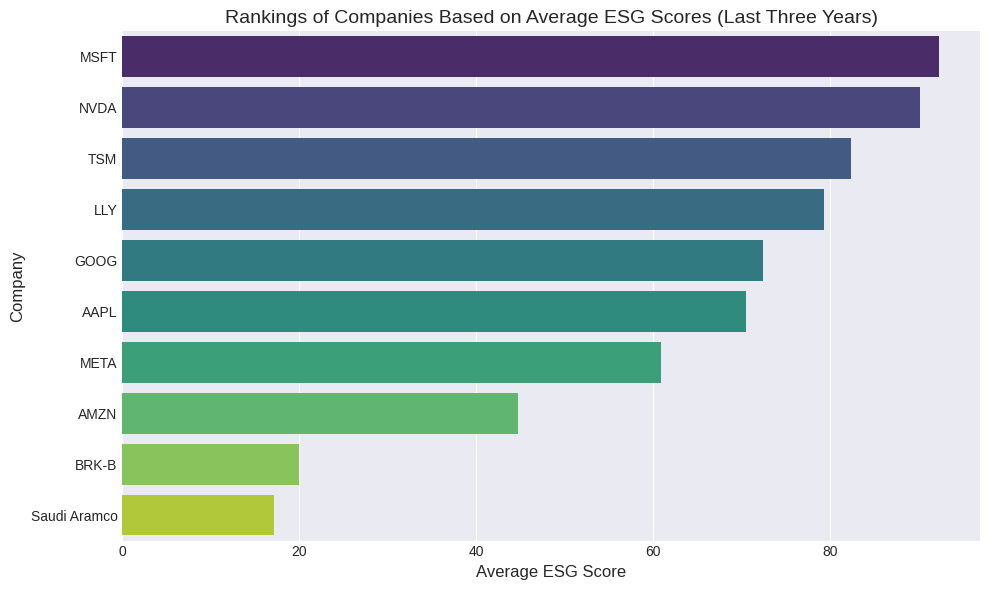

In [179]:
#Taking average of ESG score in the past three years

ESG_Scores_df_filtered['Year'] = ESG_Scores_df_filtered['Year'].astype(int)


# Group data by 'Company', calculate average 'ESG Score' over the last three years
average_esg = ESG_Scores_df_filtered.groupby('Company')['score'].mean().reset_index()

# Rank companies based on average ESG score
ranked_companies_esg = average_esg.sort_values(by='score', ascending=False).reset_index(drop=True)

# Display the rankings
print("Rankings of companies based on average ESG score over the last three years:")
print(ranked_companies_esg)


plt.style.use('seaborn-darkgrid')

# Creating the plot
plt.figure(figsize=(10, 6))
sns.barplot(x='score', y='Company', data=ranked_companies_esg, palette='viridis')

# Adding labels and title
plt.xlabel('Average ESG Score', fontsize=12)
plt.ylabel('Company', fontsize=12)
plt.title('Rankings of Companies Based on Average ESG Scores (Last Three Years)', fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()


Correlation between average stock prices and average ESG scores: 0.29435754522330126


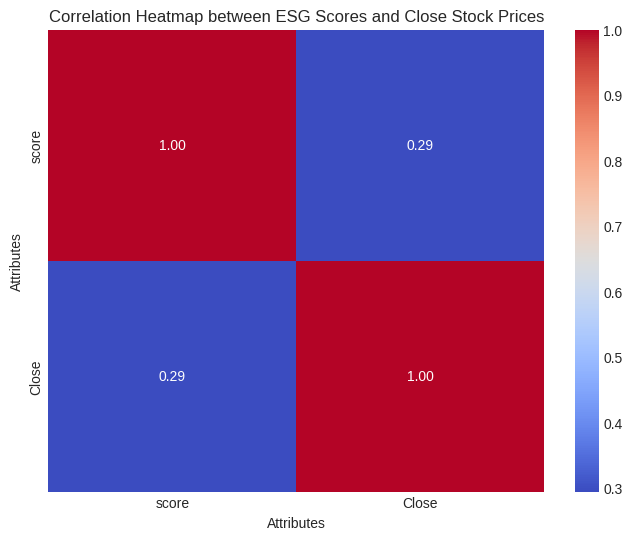

In [180]:


# Merge the rankings based on the 'Company' column
merged_rankings = pd.merge(ranked_companies, ranked_companies_esg, on='Company', suffixes=('_stock_price', '_esg'))

# Calculating the correlation coefficient
correlation = merged_rankings['Close'].corr(merged_rankings['score'])
print("Correlation between average stock prices and average ESG scores:", correlation)

# Creating a merged DataFrame
merged_df = pd.merge(ranked_companies, ranked_companies_esg, on='Company')


# Calculating correlation matrix
correlation_matrix = merged_df[['score', 'Close']].corr()

# Plotting heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap between ESG Scores and Close Stock Prices')
plt.xlabel('Attributes')
plt.ylabel('Attributes')
plt.show()



In [181]:


# Loading the dataset
merged_df1 = pd.read_csv('/content/ESG and Stock(Merged data).csv')  # Replace 'your_data.csv' with the path to your dataset

# Converting the 'Date' column to datetime format
merged_df1['Date'] = pd.to_datetime(merged_df1['Date'])

# Calculating Daily Returns
merged_df1['Daily_Return'] = merged_df1['Close'].pct_change()

# Calculating Standard Deviation of Daily Returns
daily_returns_std = merged_df1['Daily_Return'].std()
#
print("Standard Deviation of Daily Returns:", daily_returns_std)

# Calculating Average True Range (ATR)
merged_df1['High_Low_Range'] = merged_df1['High'] - merged_df1['Low']
merged_df1['High_PreviousClose_Range'] = abs(merged_df1['High'] - merged_df1['Close'].shift(1))
merged_df1['Low_PreviousClose_Range'] = abs(merged_df1['Low'] - merged_df1['Close'].shift(1))
merged_df1['TR'] = merged_df1[['High_Low_Range', 'High_PreviousClose_Range', 'Low_PreviousClose_Range']].max(axis=1)
atr = merged_df1['TR'].mean()

print("Average True Range (ATR):", atr)


Standard Deviation of Daily Returns: 0.038865981613247336
Average True Range (ATR): 5.3969958793034705


Correlation between ESG scores and standard deviation of daily returns (std dev): -0.029844573649173763
Correlation between ESG scores and average true range (ATR): -0.06683618694975066


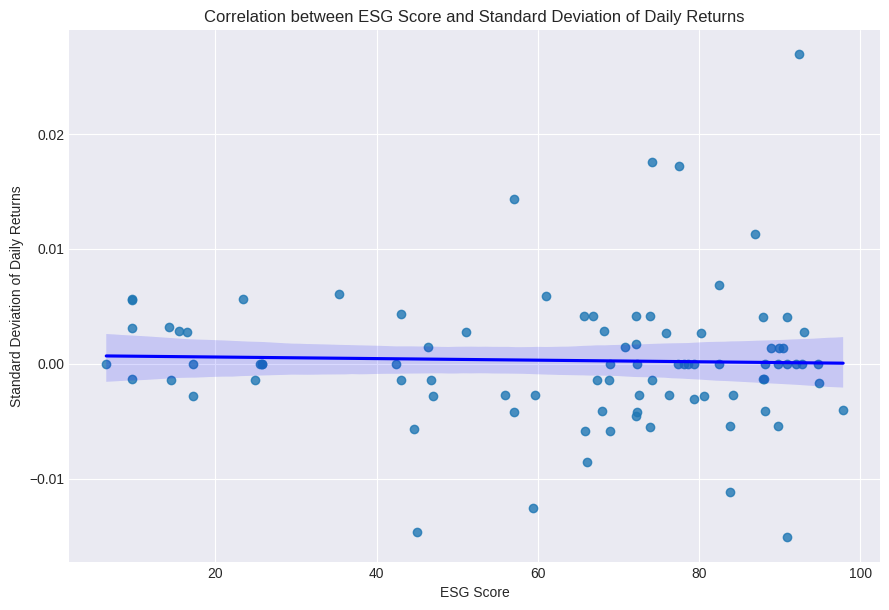

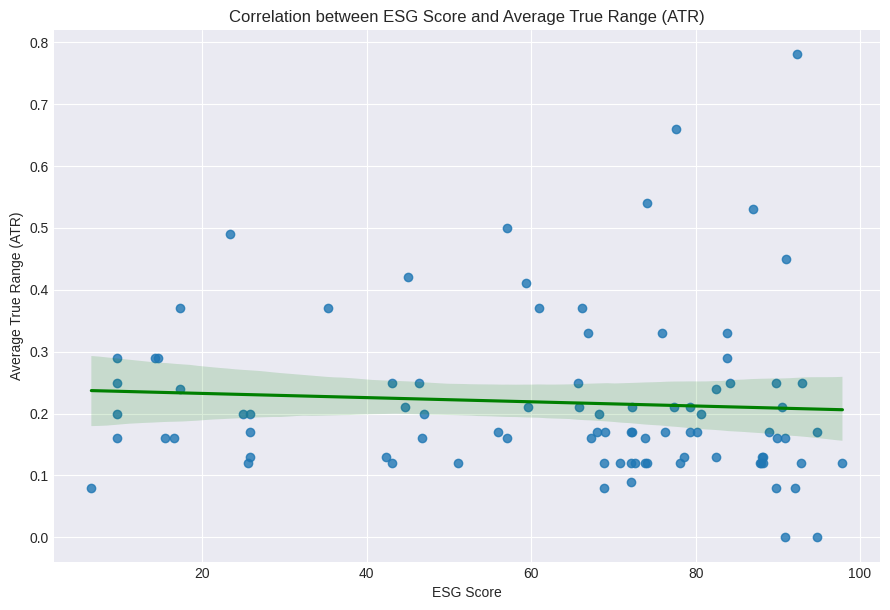

In [182]:

# Calculating correlation between ESG scores and standard deviation of daily returns
correlation_std_dev = merged_df1['score'].corr(merged_df1['Daily_Return'])

# Calculating correlation between ESG scores and average true range (ATR)
correlation_atr = merged_df1['score'].corr(merged_df1['TR'])

print("Correlation between ESG scores and standard deviation of daily returns (std dev):", correlation_std_dev)
print("Correlation between ESG scores and average true range (ATR):", correlation_atr)


# Creating scatter plot with regression line for correlation between ESG scores and standard deviation of daily returns
sns.lmplot(x='score', y='Daily_Return', data=merged_df1, height=6, aspect=1.5, line_kws={'color': 'blue'})
plt.xlabel('ESG Score')
plt.ylabel('Standard Deviation of Daily Returns')
plt.title('Correlation between ESG Score and Standard Deviation of Daily Returns')
plt.grid(True)
plt.show()

# Creating scatter plot with regression line for correlation between ESG scores and average true range (ATR)
sns.lmplot(x='score', y='TR', data=merged_df1, height=6, aspect=1.5, line_kws={'color': 'green'})
plt.xlabel('ESG Score')
plt.ylabel('Average True Range (ATR)')
plt.title('Correlation between ESG Score and Average True Range (ATR)')
plt.grid(True)
plt.show()


In [183]:
#Loading and cleaning market captilization
market_cap = pd.read_csv('/content/Marketcap Data(Sheet1).csv')
market_cap_filtered = market_cap.dropna()
print(market_cap_filtered)


# Calculating average market capitalization for each company
average_market_cap = market_cap_filtered.groupby('Company')['marketcap'].mean()

# Printing the resulting DataFrame
print("Average Market Capitalization for Each Company:")
print(average_market_cap)





         Company    Year  marketcap
0   Saudi aramco  2021.0    1908.00
1   Saudi aramco  2022.0    1881.00
2   Saudi aramco  2023.0    2133.00
3           AAPL  2021.0    2901.00
4           AAPL  2022.0    2066.00
5           AAPL  2023.0    2994.00
6           AMZN  2021.0    1691.00
7           AMZN  2022.0     856.94
8           AMZN  2023.0    1570.00
9          BRK-B  2021.0     669.12
10         BRK-B  2022.0     681.77
11         BRK-B  2023.0     777.45
12          GOOG  2021.0    1917.00
13          GOOG  2022.0    1145.00
14          GOOG  2023.0    1756.00
15           LLY  2021.0     264.22
16           LLY  2022.0     347.61
17           LLY  2023.0     553.36
18          META  2021.0     921.93
19          META  2022.0     319.88
20          META  2023.0     909.62
21          MSFT  2021.0    2522.00
22          MSFT  2022.0    1787.00
23          MSFT  2023.0    2794.00
24          NVDA  2021.0     735.27
25          NVDA  2022.0     364.18
26          NVDA  2023.0    

In [184]:
merged_df2 = pd.merge(market_cap_filtered, ESG_Scores_df_filtered, on='Company')
print(merged_df2)

    Company  Year_x  marketcap  Year_y  score
0      AAPL  2021.0    2901.00    2021  67.97
1      AAPL  2021.0    2901.00    2021  68.93
2      AAPL  2021.0    2901.00    2021  72.16
3      AAPL  2021.0    2901.00    2022  68.85
4      AAPL  2021.0    2901.00    2022  72.60
..      ...     ...        ...     ...    ...
238     TSM  2023.0     539.38    2022  88.94
239     TSM  2023.0     539.38    2022  88.10
240     TSM  2023.0     539.38    2023  82.46
241     TSM  2023.0     539.38    2023  82.46
242     TSM  2023.0     539.38    2023  78.09

[243 rows x 5 columns]


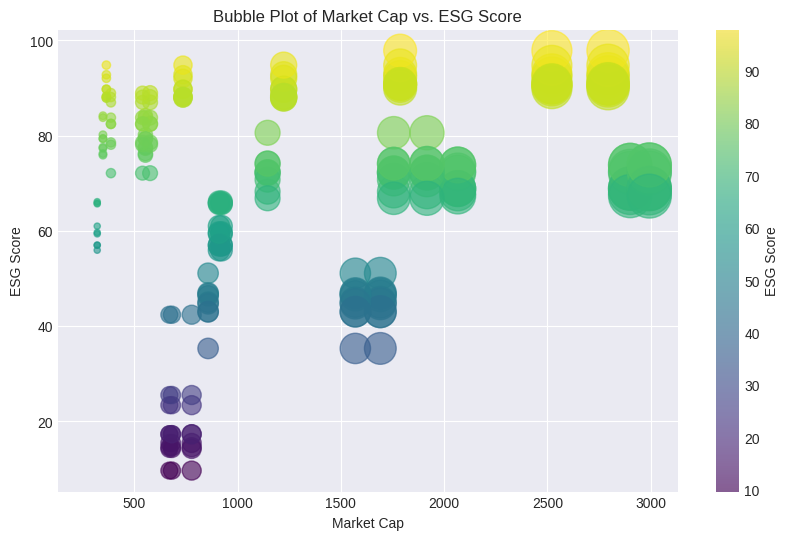

Correlation coefficient between Market Cap and ESG Score: 0.16641010734071648


In [185]:
mrkt_cap = merged_df2['marketcap']
esg_score = merged_df2['score']

# Calculating the correlation coefficient
correlation = mrkt_cap.corr(esg_score)

# Normalizing market cap values to use as bubble sizes
bubble_sizes = (mrkt_cap - mrkt_cap.min()) / (mrkt_cap.max() - mrkt_cap.min()) * 1000

# Plotting the bubble plot
plt.figure(figsize=(10, 6))
plt.scatter(mrkt_cap, esg_score, s=bubble_sizes, c=esg_score, cmap='viridis', alpha=0.6)
plt.title('Bubble Plot of Market Cap vs. ESG Score')
plt.xlabel('Market Cap')
plt.ylabel('ESG Score')
plt.colorbar(label='ESG Score')
plt.grid(True)
plt.show()

print("Correlation coefficient between Market Cap and ESG Score:", correlation)
